In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Pre-destab profiles

In [3]:
list_D=[0.005, 0.01, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4]

In [ ]:
prof_destab_9={}

for D in list_D:
    try:
        prof_destab_9[D]=pd.read_csv('t_destab_D_v3/D%s/f_profiles.dat'%str(D), sep=' ', names=np.arange(600), index_col=False)
    except: 
        print(9,D)
        


In [ ]:
prof_destab_1={}
for D in list_D:
    try:
        prof_destab_1[D]=pd.read_csv('../1nei/t_destab_D_v3/D%s/f_profiles.dat'%str(D), sep=' ', names=np.arange(200), index_col=False)

    except: 
        print(1,D)

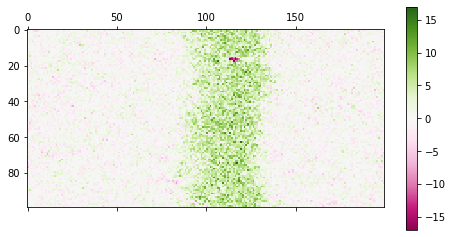

In [426]:
k=17
D=0.16
V=np.max(prof_destab_1[D].values[k*100:(k+1)*100,:])
plt.matshow(prof_destab_1[D].values[k*100:(k+1)*100,:], cmap='PiYG', vmin=-V, vmax=V)
plt.colorbar()

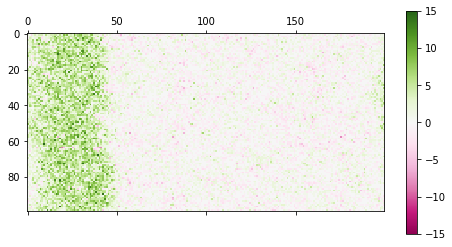

In [311]:
k=1
D=0.2
V=np.max(prof_destab_1[D].values[k*100:(k+1)*100,:])
plt.matshow(np.roll(prof_destab_1[D].values[k*100:(k+1)*100,:], 100), cmap='PiYG', vmin=-V, vmax=V)
plt.colorbar()
# plt.xlim(30,150)
# plt.ylim(100,60)

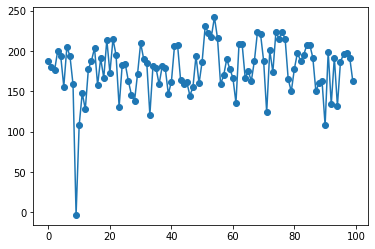

In [294]:
plt.plot(np.sum(prof_destab_1[D].values[k*100:(k+1)*100,:],axis=1), 'o-')

In [443]:
k=0
D=0.26
V=np.max(prof_destab_9[D].values[k*300:(k+1)*300,:])
plt.matshow(prof_destab_9[D].values[k*300:(k+1)*300,:], cmap='PiYG', vmin=-V, vmax=V)
plt.colorbar()

KeyError: 0.26

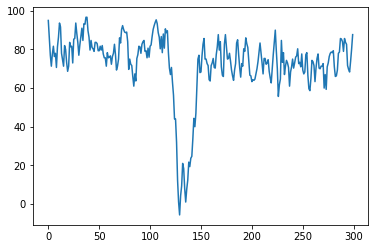

In [297]:
plt.plot(np.sum(prof_destab_9[D].values[k*300:(k+1)*300,:],axis=1))

# Destab times 

In [433]:
list_D=[0.005, 0.01, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.22, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4]

In [434]:
for D in list_D:
    print(D, end=' ')

0.005 0.01 0.02 0.04 0.06 0.08 0.1 0.12 0.14 0.16 0.18 0.2 0.22 0.28 0.3 0.32 0.34 0.36 0.38 0.4 

In [435]:
t_destab_9={}
mean_t_9=[]
std_t_9=[]

t_destab_1={}
mean_t_1=[]
std_t_1=[]


for D in list_D:
    try:
        t_destab_9[D]=np.loadtxt('t_destab_D_v3/D%s/f_td.dat'%str(D))
        mean_t_9.append(np.mean(t_destab_9[D]))
        std_t_9.append(np.std(t_destab_9[D]))
        print(D, t_destab_9[D].shape[0])
    except: 
        print(9,D)
        
for D in list_D:
    try:
        t_destab_1[D]=pd.read_csv('../1nei/t_destab_D_v3/D%s/f_td.dat'%str(D)).values
        mean_t_1.append(np.mean(t_destab_1[D]))
        std_t_1.append(np.std(t_destab_1[D]))
    except: 
        mean_t_1.append(np.nan)
        std_t_1.append(np.nan)

        print(1,D)

0.005 50
0.01 50
0.02 50
0.04 50
0.06 50
0.08 50
0.1 50
0.12 50
0.14 44
0.16 10
0.18 10
0.2 7
0.22 5
0.28 0
0.3 3
0.32 0
0.34 0
0.36 0
9 0.38
0.4 0


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: loadtxt: Empty input file: "t_destab_D_v3/D0.28/f_td.dat"
  if sys.path[0] == '':
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarn

No handles with labels found to put in legend.


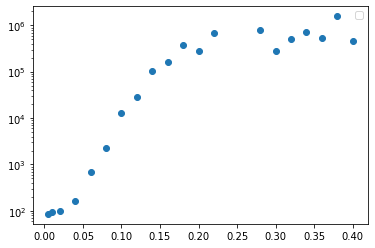

In [436]:
plt.plot(list_D, mean_t_1, 'o')
plt.legend()
plt.yscale('log')

[]

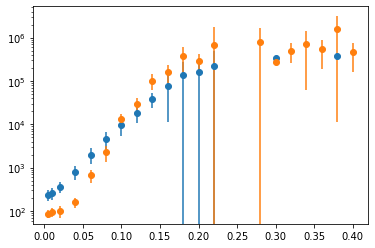

In [439]:
plt.errorbar(list_D, mean_t_9, yerr=3*np.array(std_t_9)/np.sqrt([t_destab_9[D].shape[0] if t_destab_9[D].shape!=() else 1 for D in list_D]), fmt='o', label='9 boxes')
plt.errorbar(list(t_destab_1), mean_t_1[:len(list(t_destab_1))], yerr=3*np.array(std_t_1[:len(list(t_destab_1))])/np.sqrt([t_destab_1[tD].shape[0] if t_destab_1[tD].shape!=() else 1 for tD in t_destab_1]), fmt='o', label='1 box')
plt.semilogy()

Text(0, 0.5, '$\\langle \\tau \\rangle$')

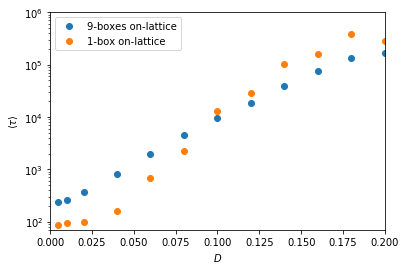

In [441]:
#plt.errorbar(list(t_destab_9), mean_t_9, yerr=3*np.array(std_t_9)/np.sqrt([t_destab_9[tD].shape[0] if t_destab_9[tD].shape!=() else 1 for tD in t_destab_9]), fmt='o', label='9 boxes')
#plt.errorbar(list(t_destab_1), mean_t_1[:len(list(t_destab_1))], yerr=3*np.array(std_t_1[:len(list(t_destab_1))])/np.sqrt([t_destab_1[tD].shape[0] if t_destab_1[tD].shape!=() else 1 for tD in t_destab_1]), fmt='o', label='1 box')

plt.semilogy(list(t_destab_9), mean_t_9, 'o', label='9-boxes on-lattice')
plt.plot(list_D, mean_t_1, 'o', label='1-box on-lattice')

plt.legend()

plt.xlim(0,0.2)
plt.ylim(7e1,1e6)
plt.xlabel(r'$D$')
plt.ylabel(r'$\langle \tau \rangle$')

In [23]:
D=0.26
t_destab_9[D]

array(39545.64)

In [20]:
D=0.3
sns.distplot(t_destab_1[0.22])
plt.yscale('log')

KeyError: 0.22

In [21]:
absD=np.linspace(0.005, 0.2, 100)
plt.semilogy(absD, np.exp((fitLogi(absD, L=2.4, k=50, x0=0.1, t0=0))))

NameError: name 'fitLogi' is not defined

In [600]:
def Logi(x, L, k, x0, t0):
    #print(x, L, k, x0)
    return(L/(1+np.exp(-k*(x-x0))+t0))

In [640]:
def fitLogi(x, L, k, x0, t0):
    #print(x, L, k, x0)
    return(t0+np.exp(L/(1+np.exp(-k*(x-x0)))))

In [472]:
from scipy.optimize import curve_fit

In [604]:
mean_t_1=np.array(mean_t_1)
list_D=np.array(list_D)

In [622]:
popt, pcov = curve_fit(fitLogi, list_D[~np.isnan(mean_t_1)], mean_t_1[~np.isnan(mean_t_1)], p0=[2.4, 50, 0.1, 0])

/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [623]:
popt

array([ 7.4733897 ,  2.75496439, -0.08144689, -0.88198435])

In [531]:
mean_t_1[~np.isnan(mean_t_1)]

array([8.95586000e+01, 9.55958000e+01, 1.10073800e+02, 1.92737000e+02,
       5.12698200e+02, 2.96357240e+03, 1.18470874e+04, 5.11576988e+04,
       1.16891264e+05, 1.68298985e+05, 1.83759147e+05])

In [533]:
 list_D[~np.isnan(mean_t_1)]

array([0.005, 0.01 , 0.02 , 0.04 , 0.06 , 0.08 , 0.1  , 0.12 , 0.14 ,
       0.16 , 0.18 ])

# Vertical spreading 1box

In [193]:
from scipy import ndimage

In [194]:
def mean_filter(X):
    return((np.roll(X, 1, axis=0)+np.roll(X, -1, axis=0)+np.roll(X, 1, axis=1)+np.roll(X, -1, axis=1)+X)/5)

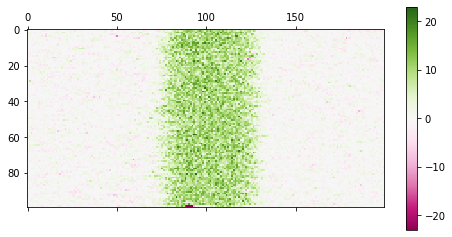

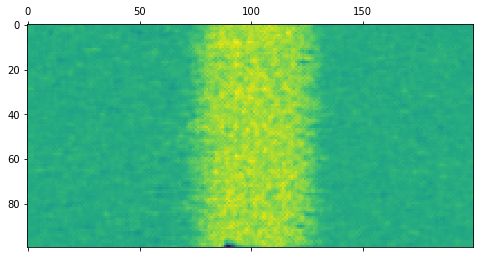

In [246]:
D=0.005
k=0
X=prof_destab_1[D].values[k*100:(k+1)*100,:]
V=np.max(X)
plt.matshow(X, cmap='PiYG', vmin=-V, vmax=V)
plt.colorbar()
plt.matshow(mean_filter(X))

In [319]:
mag_thresh=10

In [428]:
vertical_sizes_1={}
vertical_sizes_9={}
for D in list_D:
    vertical_sizes_1[D]=[]
    vertical_sizes_9[D]=[]
    for k in prof_destab_1[D]:
        try:
            X=prof_destab_1[D].values[k*100:(k+1)*100,:]
            lab_array, ng = ndimage.label((mean_filter(X)<-mag_thresh), np.ones((3,3)))
            lab, nlab = np.unique(lab_array, return_counts=True)
            X_clust=(lab_array==lab[np.argsort(nlab)[-2]])
            vertical_sizes_1[D].append(np.sum(np.sum(X_clust, axis=1)!=0))
        except:
            pass
        
    for k in prof_destab_9[D]:
        try:
            X=prof_destab_9[D].values[k*300:(k+1)*300,:]
            lab_array, ng = ndimage.label((mean_filter(X)<-2), np.ones((3,3)))
            lab, nlab = np.unique(lab_array, return_counts=True)
            X_clust=(lab_array==lab[np.argsort(nlab)[-2]])
            vertical_sizes_9[D].append(np.sum(np.sum(X_clust, axis=1)!=0))
        except:
            print(9, D, k)

9 0.005 50
9 0.005 51
9 0.005 52
9 0.005 53
9 0.005 54
9 0.005 55
9 0.005 56
9 0.005 57
9 0.005 58
9 0.005 59
9 0.005 60
9 0.005 61
9 0.005 62
9 0.005 63
9 0.005 64
9 0.005 65
9 0.005 66
9 0.005 67
9 0.005 68
9 0.005 69
9 0.005 70
9 0.005 71
9 0.005 72
9 0.005 73
9 0.005 74
9 0.005 75
9 0.005 76
9 0.005 77
9 0.005 78
9 0.005 79
9 0.005 80
9 0.005 81
9 0.005 82
9 0.005 83
9 0.005 84
9 0.005 85
9 0.005 86
9 0.005 87
9 0.005 88
9 0.005 89
9 0.005 90
9 0.005 91
9 0.005 92
9 0.005 93
9 0.005 94
9 0.005 95
9 0.005 96
9 0.005 97
9 0.005 98
9 0.005 99
9 0.005 100
9 0.005 101
9 0.005 102
9 0.005 103
9 0.005 104
9 0.005 105
9 0.005 106
9 0.005 107
9 0.005 108
9 0.005 109
9 0.005 110
9 0.005 111
9 0.005 112
9 0.005 113
9 0.005 114
9 0.005 115
9 0.005 116
9 0.005 117
9 0.005 118
9 0.005 119
9 0.005 120
9 0.005 121
9 0.005 122
9 0.005 123
9 0.005 124
9 0.005 125
9 0.005 126
9 0.005 127
9 0.005 128
9 0.005 129
9 0.005 130
9 0.005 131
9 0.005 132
9 0.005 133
9 0.005 134
9 0.005 135
9 0.005 136
9 0.00

9 0.02 50
9 0.02 51
9 0.02 52
9 0.02 53
9 0.02 54
9 0.02 55
9 0.02 56
9 0.02 57
9 0.02 58
9 0.02 59
9 0.02 60
9 0.02 61
9 0.02 62
9 0.02 63
9 0.02 64
9 0.02 65
9 0.02 66
9 0.02 67
9 0.02 68
9 0.02 69
9 0.02 70
9 0.02 71
9 0.02 72
9 0.02 73
9 0.02 74
9 0.02 75
9 0.02 76
9 0.02 77
9 0.02 78
9 0.02 79
9 0.02 80
9 0.02 81
9 0.02 82
9 0.02 83
9 0.02 84
9 0.02 85
9 0.02 86
9 0.02 87
9 0.02 88
9 0.02 89
9 0.02 90
9 0.02 91
9 0.02 92
9 0.02 93
9 0.02 94
9 0.02 95
9 0.02 96
9 0.02 97
9 0.02 98
9 0.02 99
9 0.02 100
9 0.02 101
9 0.02 102
9 0.02 103
9 0.02 104
9 0.02 105
9 0.02 106
9 0.02 107
9 0.02 108
9 0.02 109
9 0.02 110
9 0.02 111
9 0.02 112
9 0.02 113
9 0.02 114
9 0.02 115
9 0.02 116
9 0.02 117
9 0.02 118
9 0.02 119
9 0.02 120
9 0.02 121
9 0.02 122
9 0.02 123
9 0.02 124
9 0.02 125
9 0.02 126
9 0.02 127
9 0.02 128
9 0.02 129
9 0.02 130
9 0.02 131
9 0.02 132
9 0.02 133
9 0.02 134
9 0.02 135
9 0.02 136
9 0.02 137
9 0.02 138
9 0.02 139
9 0.02 140
9 0.02 141
9 0.02 142
9 0.02 143
9 0.02 144
9 0.0

9 0.04 437
9 0.04 438
9 0.04 439
9 0.04 440
9 0.04 441
9 0.04 442
9 0.04 443
9 0.04 444
9 0.04 445
9 0.04 446
9 0.04 447
9 0.04 448
9 0.04 449
9 0.04 450
9 0.04 451
9 0.04 452
9 0.04 453
9 0.04 454
9 0.04 455
9 0.04 456
9 0.04 457
9 0.04 458
9 0.04 459
9 0.04 460
9 0.04 461
9 0.04 462
9 0.04 463
9 0.04 464
9 0.04 465
9 0.04 466
9 0.04 467
9 0.04 468
9 0.04 469
9 0.04 470
9 0.04 471
9 0.04 472
9 0.04 473
9 0.04 474
9 0.04 475
9 0.04 476
9 0.04 477
9 0.04 478
9 0.04 479
9 0.04 480
9 0.04 481
9 0.04 482
9 0.04 483
9 0.04 484
9 0.04 485
9 0.04 486
9 0.04 487
9 0.04 488
9 0.04 489
9 0.04 490
9 0.04 491
9 0.04 492
9 0.04 493
9 0.04 494
9 0.04 495
9 0.04 496
9 0.04 497
9 0.04 498
9 0.04 499
9 0.04 500
9 0.04 501
9 0.04 502
9 0.04 503
9 0.04 504
9 0.04 505
9 0.04 506
9 0.04 507
9 0.04 508
9 0.04 509
9 0.04 510
9 0.04 511
9 0.04 512
9 0.04 513
9 0.04 514
9 0.04 515
9 0.04 516
9 0.04 517
9 0.04 518
9 0.04 519
9 0.04 520
9 0.04 521
9 0.04 522
9 0.04 523
9 0.04 524
9 0.04 525
9 0.04 526
9 0.04 527

9 0.08 415
9 0.08 416
9 0.08 417
9 0.08 418
9 0.08 419
9 0.08 420
9 0.08 421
9 0.08 422
9 0.08 423
9 0.08 424
9 0.08 425
9 0.08 426
9 0.08 427
9 0.08 428
9 0.08 429
9 0.08 430
9 0.08 431
9 0.08 432
9 0.08 433
9 0.08 434
9 0.08 435
9 0.08 436
9 0.08 437
9 0.08 438
9 0.08 439
9 0.08 440
9 0.08 441
9 0.08 442
9 0.08 443
9 0.08 444
9 0.08 445
9 0.08 446
9 0.08 447
9 0.08 448
9 0.08 449
9 0.08 450
9 0.08 451
9 0.08 452
9 0.08 453
9 0.08 454
9 0.08 455
9 0.08 456
9 0.08 457
9 0.08 458
9 0.08 459
9 0.08 460
9 0.08 461
9 0.08 462
9 0.08 463
9 0.08 464
9 0.08 465
9 0.08 466
9 0.08 467
9 0.08 468
9 0.08 469
9 0.08 470
9 0.08 471
9 0.08 472
9 0.08 473
9 0.08 474
9 0.08 475
9 0.08 476
9 0.08 477
9 0.08 478
9 0.08 479
9 0.08 480
9 0.08 481
9 0.08 482
9 0.08 483
9 0.08 484
9 0.08 485
9 0.08 486
9 0.08 487
9 0.08 488
9 0.08 489
9 0.08 490
9 0.08 491
9 0.08 492
9 0.08 493
9 0.08 494
9 0.08 495
9 0.08 496
9 0.08 497
9 0.08 498
9 0.08 499
9 0.08 500
9 0.08 501
9 0.08 502
9 0.08 503
9 0.08 504
9 0.08 505

9 0.12 298
9 0.12 299
9 0.12 300
9 0.12 301
9 0.12 302
9 0.12 303
9 0.12 304
9 0.12 305
9 0.12 306
9 0.12 307
9 0.12 308
9 0.12 309
9 0.12 310
9 0.12 311
9 0.12 312
9 0.12 313
9 0.12 314
9 0.12 315
9 0.12 316
9 0.12 317
9 0.12 318
9 0.12 319
9 0.12 320
9 0.12 321
9 0.12 322
9 0.12 323
9 0.12 324
9 0.12 325
9 0.12 326
9 0.12 327
9 0.12 328
9 0.12 329
9 0.12 330
9 0.12 331
9 0.12 332
9 0.12 333
9 0.12 334
9 0.12 335
9 0.12 336
9 0.12 337
9 0.12 338
9 0.12 339
9 0.12 340
9 0.12 341
9 0.12 342
9 0.12 343
9 0.12 344
9 0.12 345
9 0.12 346
9 0.12 347
9 0.12 348
9 0.12 349
9 0.12 350
9 0.12 351
9 0.12 352
9 0.12 353
9 0.12 354
9 0.12 355
9 0.12 356
9 0.12 357
9 0.12 358
9 0.12 359
9 0.12 360
9 0.12 361
9 0.12 362
9 0.12 363
9 0.12 364
9 0.12 365
9 0.12 366
9 0.12 367
9 0.12 368
9 0.12 369
9 0.12 370
9 0.12 371
9 0.12 372
9 0.12 373
9 0.12 374
9 0.12 375
9 0.12 376
9 0.12 377
9 0.12 378
9 0.12 379
9 0.12 380
9 0.12 381
9 0.12 382
9 0.12 383
9 0.12 384
9 0.12 385
9 0.12 386
9 0.12 387
9 0.12 388

9 0.16 66
9 0.16 67
9 0.16 68
9 0.16 69
9 0.16 70
9 0.16 71
9 0.16 72
9 0.16 73
9 0.16 74
9 0.16 75
9 0.16 76
9 0.16 77
9 0.16 78
9 0.16 79
9 0.16 80
9 0.16 81
9 0.16 82
9 0.16 83
9 0.16 84
9 0.16 85
9 0.16 86
9 0.16 87
9 0.16 88
9 0.16 89
9 0.16 90
9 0.16 91
9 0.16 92
9 0.16 93
9 0.16 94
9 0.16 95
9 0.16 96
9 0.16 97
9 0.16 98
9 0.16 99
9 0.16 100
9 0.16 101
9 0.16 102
9 0.16 103
9 0.16 104
9 0.16 105
9 0.16 106
9 0.16 107
9 0.16 108
9 0.16 109
9 0.16 110
9 0.16 111
9 0.16 112
9 0.16 113
9 0.16 114
9 0.16 115
9 0.16 116
9 0.16 117
9 0.16 118
9 0.16 119
9 0.16 120
9 0.16 121
9 0.16 122
9 0.16 123
9 0.16 124
9 0.16 125
9 0.16 126
9 0.16 127
9 0.16 128
9 0.16 129
9 0.16 130
9 0.16 131
9 0.16 132
9 0.16 133
9 0.16 134
9 0.16 135
9 0.16 136
9 0.16 137
9 0.16 138
9 0.16 139
9 0.16 140
9 0.16 141
9 0.16 142
9 0.16 143
9 0.16 144
9 0.16 145
9 0.16 146
9 0.16 147
9 0.16 148
9 0.16 149
9 0.16 150
9 0.16 151
9 0.16 152
9 0.16 153
9 0.16 154
9 0.16 155
9 0.16 156
9 0.16 157
9 0.16 158
9 0.16 159


9 0.18 483
9 0.18 484
9 0.18 485
9 0.18 486
9 0.18 487
9 0.18 488
9 0.18 489
9 0.18 490
9 0.18 491
9 0.18 492
9 0.18 493
9 0.18 494
9 0.18 495
9 0.18 496
9 0.18 497
9 0.18 498
9 0.18 499
9 0.18 500
9 0.18 501
9 0.18 502
9 0.18 503
9 0.18 504
9 0.18 505
9 0.18 506
9 0.18 507
9 0.18 508
9 0.18 509
9 0.18 510
9 0.18 511
9 0.18 512
9 0.18 513
9 0.18 514
9 0.18 515
9 0.18 516
9 0.18 517
9 0.18 518
9 0.18 519
9 0.18 520
9 0.18 521
9 0.18 522
9 0.18 523
9 0.18 524
9 0.18 525
9 0.18 526
9 0.18 527
9 0.18 528
9 0.18 529
9 0.18 530
9 0.18 531
9 0.18 532
9 0.18 533
9 0.18 534
9 0.18 535
9 0.18 536
9 0.18 537
9 0.18 538
9 0.18 539
9 0.18 540
9 0.18 541
9 0.18 542
9 0.18 543
9 0.18 544
9 0.18 545
9 0.18 546
9 0.18 547
9 0.18 548
9 0.18 549
9 0.18 550
9 0.18 551
9 0.18 552
9 0.18 553
9 0.18 554
9 0.18 555
9 0.18 556
9 0.18 557
9 0.18 558
9 0.18 559
9 0.18 560
9 0.18 561
9 0.18 562
9 0.18 563
9 0.18 564
9 0.18 565
9 0.18 566
9 0.18 567
9 0.18 568
9 0.18 569
9 0.18 570
9 0.18 571
9 0.18 572
9 0.18 573

9 0.22 376
9 0.22 377
9 0.22 378
9 0.22 379
9 0.22 380
9 0.22 381
9 0.22 382
9 0.22 383
9 0.22 384
9 0.22 385
9 0.22 386
9 0.22 387
9 0.22 388
9 0.22 389
9 0.22 390
9 0.22 391
9 0.22 392
9 0.22 393
9 0.22 394
9 0.22 395
9 0.22 396
9 0.22 397
9 0.22 398
9 0.22 399
9 0.22 400
9 0.22 401
9 0.22 402
9 0.22 403
9 0.22 404
9 0.22 405
9 0.22 406
9 0.22 407
9 0.22 408
9 0.22 409
9 0.22 410
9 0.22 411
9 0.22 412
9 0.22 413
9 0.22 414
9 0.22 415
9 0.22 416
9 0.22 417
9 0.22 418
9 0.22 419
9 0.22 420
9 0.22 421
9 0.22 422
9 0.22 423
9 0.22 424
9 0.22 425
9 0.22 426
9 0.22 427
9 0.22 428
9 0.22 429
9 0.22 430
9 0.22 431
9 0.22 432
9 0.22 433
9 0.22 434
9 0.22 435
9 0.22 436
9 0.22 437
9 0.22 438
9 0.22 439
9 0.22 440
9 0.22 441
9 0.22 442
9 0.22 443
9 0.22 444
9 0.22 445
9 0.22 446
9 0.22 447
9 0.22 448
9 0.22 449
9 0.22 450
9 0.22 451
9 0.22 452
9 0.22 453
9 0.22 454
9 0.22 455
9 0.22 456
9 0.22 457
9 0.22 458
9 0.22 459
9 0.22 460
9 0.22 461
9 0.22 462
9 0.22 463
9 0.22 464
9 0.22 465
9 0.22 466

9 0.3 169
9 0.3 170
9 0.3 171
9 0.3 172
9 0.3 173
9 0.3 174
9 0.3 175
9 0.3 176
9 0.3 177
9 0.3 178
9 0.3 179
9 0.3 180
9 0.3 181
9 0.3 182
9 0.3 183
9 0.3 184
9 0.3 185
9 0.3 186
9 0.3 187
9 0.3 188
9 0.3 189
9 0.3 190
9 0.3 191
9 0.3 192
9 0.3 193
9 0.3 194
9 0.3 195
9 0.3 196
9 0.3 197
9 0.3 198
9 0.3 199
9 0.3 200
9 0.3 201
9 0.3 202
9 0.3 203
9 0.3 204
9 0.3 205
9 0.3 206
9 0.3 207
9 0.3 208
9 0.3 209
9 0.3 210
9 0.3 211
9 0.3 212
9 0.3 213
9 0.3 214
9 0.3 215
9 0.3 216
9 0.3 217
9 0.3 218
9 0.3 219
9 0.3 220
9 0.3 221
9 0.3 222
9 0.3 223
9 0.3 224
9 0.3 225
9 0.3 226
9 0.3 227
9 0.3 228
9 0.3 229
9 0.3 230
9 0.3 231
9 0.3 232
9 0.3 233
9 0.3 234
9 0.3 235
9 0.3 236
9 0.3 237
9 0.3 238
9 0.3 239
9 0.3 240
9 0.3 241
9 0.3 242
9 0.3 243
9 0.3 244
9 0.3 245
9 0.3 246
9 0.3 247
9 0.3 248
9 0.3 249
9 0.3 250
9 0.3 251
9 0.3 252
9 0.3 253
9 0.3 254
9 0.3 255
9 0.3 256
9 0.3 257
9 0.3 258
9 0.3 259
9 0.3 260
9 0.3 261
9 0.3 262
9 0.3 263
9 0.3 264
9 0.3 265
9 0.3 266
9 0.3 267
9 0.3 268


9 0.32 377
9 0.32 378
9 0.32 379
9 0.32 380
9 0.32 381
9 0.32 382
9 0.32 383
9 0.32 384
9 0.32 385
9 0.32 386
9 0.32 387
9 0.32 388
9 0.32 389
9 0.32 390
9 0.32 391
9 0.32 392
9 0.32 393
9 0.32 394
9 0.32 395
9 0.32 396
9 0.32 397
9 0.32 398
9 0.32 399
9 0.32 400
9 0.32 401
9 0.32 402
9 0.32 403
9 0.32 404
9 0.32 405
9 0.32 406
9 0.32 407
9 0.32 408
9 0.32 409
9 0.32 410
9 0.32 411
9 0.32 412
9 0.32 413
9 0.32 414
9 0.32 415
9 0.32 416
9 0.32 417
9 0.32 418
9 0.32 419
9 0.32 420
9 0.32 421
9 0.32 422
9 0.32 423
9 0.32 424
9 0.32 425
9 0.32 426
9 0.32 427
9 0.32 428
9 0.32 429
9 0.32 430
9 0.32 431
9 0.32 432
9 0.32 433
9 0.32 434
9 0.32 435
9 0.32 436
9 0.32 437
9 0.32 438
9 0.32 439
9 0.32 440
9 0.32 441
9 0.32 442
9 0.32 443
9 0.32 444
9 0.32 445
9 0.32 446
9 0.32 447
9 0.32 448
9 0.32 449
9 0.32 450
9 0.32 451
9 0.32 452
9 0.32 453
9 0.32 454
9 0.32 455
9 0.32 456
9 0.32 457
9 0.32 458
9 0.32 459
9 0.32 460
9 0.32 461
9 0.32 462
9 0.32 463
9 0.32 464
9 0.32 465
9 0.32 466
9 0.32 467

9 0.36 0
9 0.36 1
9 0.36 2
9 0.36 3
9 0.36 4
9 0.36 5
9 0.36 6
9 0.36 7
9 0.36 8
9 0.36 9
9 0.36 10
9 0.36 11
9 0.36 12
9 0.36 13
9 0.36 14
9 0.36 15
9 0.36 16
9 0.36 17
9 0.36 18
9 0.36 19
9 0.36 20
9 0.36 21
9 0.36 22
9 0.36 23
9 0.36 24
9 0.36 25
9 0.36 26
9 0.36 27
9 0.36 28
9 0.36 29
9 0.36 30
9 0.36 31
9 0.36 32
9 0.36 33
9 0.36 34
9 0.36 35
9 0.36 36
9 0.36 37
9 0.36 38
9 0.36 39
9 0.36 40
9 0.36 41
9 0.36 42
9 0.36 43
9 0.36 44
9 0.36 45
9 0.36 46
9 0.36 47
9 0.36 48
9 0.36 49
9 0.36 50
9 0.36 51
9 0.36 52
9 0.36 53
9 0.36 54
9 0.36 55
9 0.36 56
9 0.36 57
9 0.36 58
9 0.36 59
9 0.36 60
9 0.36 61
9 0.36 62
9 0.36 63
9 0.36 64
9 0.36 65
9 0.36 66
9 0.36 67
9 0.36 68
9 0.36 69
9 0.36 70
9 0.36 71
9 0.36 72
9 0.36 73
9 0.36 74
9 0.36 75
9 0.36 76
9 0.36 77
9 0.36 78
9 0.36 79
9 0.36 80
9 0.36 81
9 0.36 82
9 0.36 83
9 0.36 84
9 0.36 85
9 0.36 86
9 0.36 87
9 0.36 88
9 0.36 89
9 0.36 90
9 0.36 91
9 0.36 92
9 0.36 93
9 0.36 94
9 0.36 95
9 0.36 96
9 0.36 97
9 0.36 98
9 0.36 99
9 0.36 100

9 0.38 457
9 0.38 458
9 0.38 459
9 0.38 460
9 0.38 461
9 0.38 462
9 0.38 463
9 0.38 464
9 0.38 465
9 0.38 466
9 0.38 467
9 0.38 468
9 0.38 469
9 0.38 470
9 0.38 471
9 0.38 472
9 0.38 473
9 0.38 474
9 0.38 475
9 0.38 476
9 0.38 477
9 0.38 478
9 0.38 479
9 0.38 480
9 0.38 481
9 0.38 482
9 0.38 483
9 0.38 484
9 0.38 485
9 0.38 486
9 0.38 487
9 0.38 488
9 0.38 489
9 0.38 490
9 0.38 491
9 0.38 492
9 0.38 493
9 0.38 494
9 0.38 495
9 0.38 496
9 0.38 497
9 0.38 498
9 0.38 499
9 0.38 500
9 0.38 501
9 0.38 502
9 0.38 503
9 0.38 504
9 0.38 505
9 0.38 506
9 0.38 507
9 0.38 508
9 0.38 509
9 0.38 510
9 0.38 511
9 0.38 512
9 0.38 513
9 0.38 514
9 0.38 515
9 0.38 516
9 0.38 517
9 0.38 518
9 0.38 519
9 0.38 520
9 0.38 521
9 0.38 522
9 0.38 523
9 0.38 524
9 0.38 525
9 0.38 526
9 0.38 527
9 0.38 528
9 0.38 529
9 0.38 530
9 0.38 531
9 0.38 532
9 0.38 533
9 0.38 534
9 0.38 535
9 0.38 536
9 0.38 537
9 0.38 538
9 0.38 539
9 0.38 540
9 0.38 541
9 0.38 542
9 0.38 543
9 0.38 544
9 0.38 545
9 0.38 546
9 0.38 547

/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


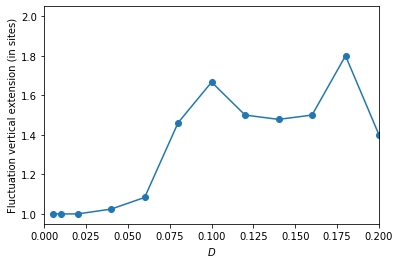

In [432]:
plt.plot(list_D, [np.mean(vertical_sizes_1[D]) for D in list_D], 'o-')
#plt.plot(list_D, [np.mean(vertical_sizes_9[D]) for D in list_D], 'o-')
plt.xlim(0,0.2)
plt.xlabel(r'$D$')
plt.ylabel(r'Fluctuation vertical extension (in sites)');